# Iris Data classification with Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
import operator
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load data

In [2]:
data = load_iris()
X = data["data"]
Y = data["target"]
X = np.insert(X,0,1, axis=1)

# Hypothysis

In [3]:
def hypothysis(x, weight):
    return x @ weight

# Sigmoid

In [4]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Use softmax for multi-class

In [5]:
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

# Optimizer

In [6]:
def Gradient_Decent(x, y, weight, alpha=0.1):
    Y_cap = hypothysis(x, weight)
    S_cap = sigmoid(Y_cap)
    weight = weight - alpha*np.dot((S_cap - y), x)/len(y)
    return weight

# Train Model

In [7]:
def fit(x, y):
    weight = np.zeros(len(X[0]))
    for i in np.arange(1,0.001,-0.0001):
        weight = Gradient_Decent(x, y, weight,i)
    return weight

# Train model with each class

In [8]:
# SeperateDataFor is ONE vs ALL splitter
def Seperate_Data_For(cls):
    x, y = [], []
    for i, j in zip(X, Y):
        j = 1 if j == cls else 0
        x.append(i)
        y.append(j)
    return x, y


def Train():
    Classes = [0, 1, 2]
    weights = dict()
    for Class in Classes:
        x, y = Seperate_Data_For(Class)
        weights[Class] = fit(x, y)
    return weights


def Predict(x,weights):
    values = []
    for weight in weights.values():
        values.append(sigmoid(hypothysis(x, weight)))
    return np.argmax(softmax(values))

In [9]:
weights = Train()

In [28]:
from sklearn.metrics import confusion_matrix

In [46]:
Y_cap = np.array([Predict(i, weights) for i in X])

"Accuracy ", (Y == Y_cap).sum() / Y.shape

('Accuracy ', array([0.98]))

<img src="confusion.png">

# Confusion Matrix

In [62]:
pd.DataFrame(confusion_matrix(Y,Y_cap),columns=data.target_names, index=data.target_names)

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49


# Let's See Error in Graph

<IPython.core.display.Javascript object>


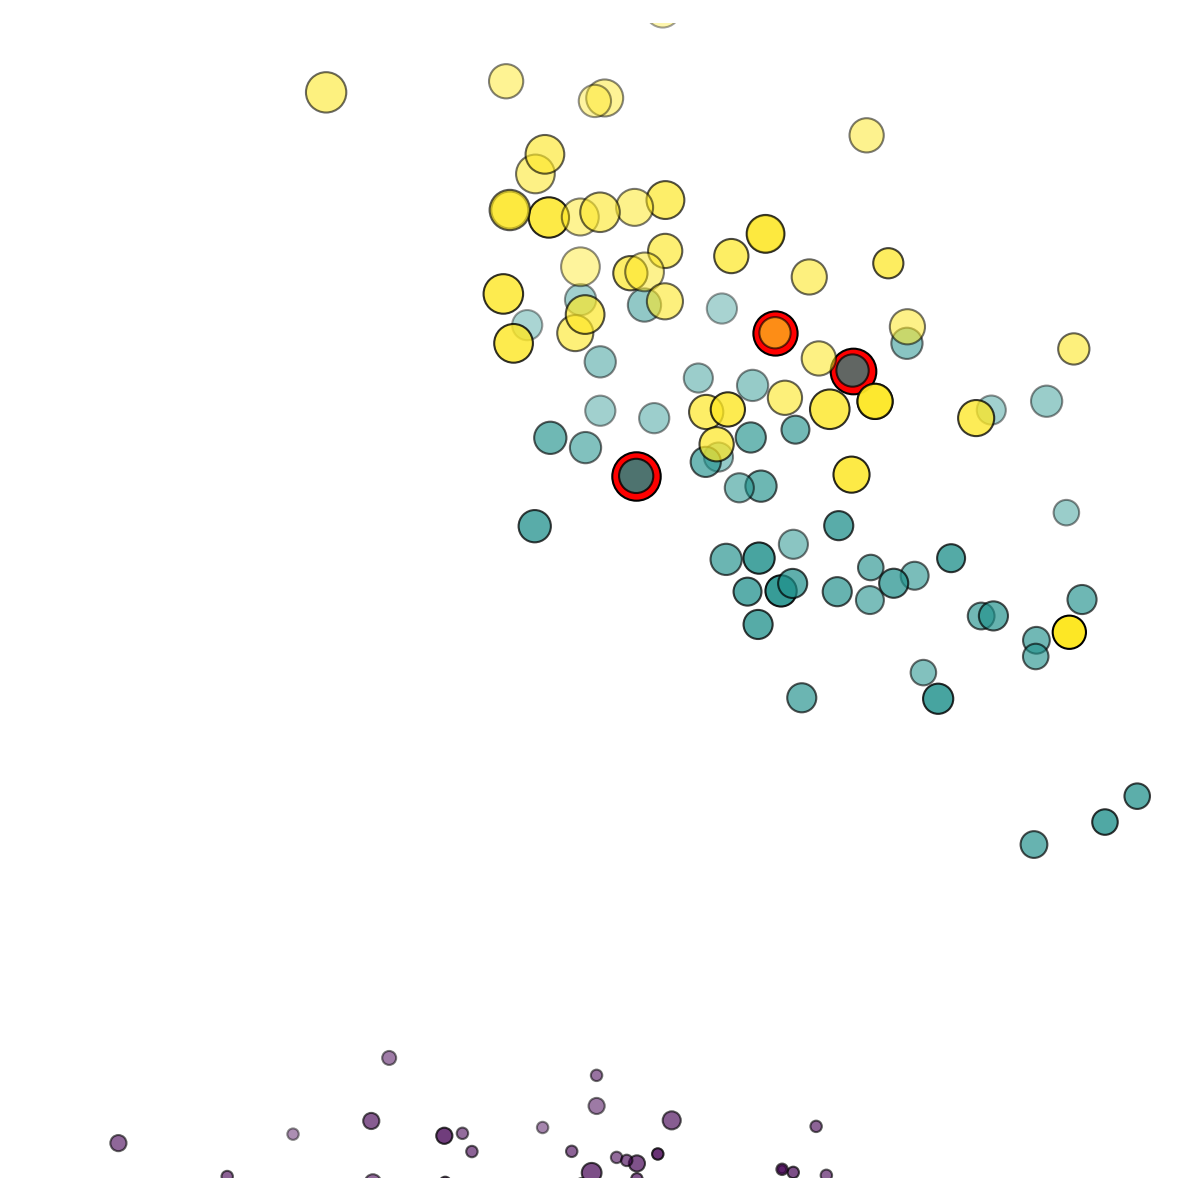

(4.12, 8.08, 1.88, 4.5200000000000005)

In [81]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = plt.subplot(111, projection="3d")


ax.scatter(X[:, 1], X[:, 2],  X[:, 3],
           s=X[:, 4]*150, edgecolor='k',
           c=Y, label="Data points")


# find Error Points
for i, x in enumerate(Y_cap != Y):
    if x:
        ax.scatter(X[i, 1], X[i, 2],  X[i, 3],
                   s=X[i, 4]*300, edgecolor='k',
                   c='red', label="Error")
plt.tight_layout()
plt.axis('off')